# Import Modules

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [42]:
file_path = 'train.csv'

data = pd.read_csv(file_path, index_col=0)

# 1 Exploratory Data Analysis

## 1.1 Preliminary observations

In [43]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [45]:
data.shape

(1460, 80)

### 1.1.1 Numerical columns

In [46]:
num_cols = data.select_dtypes(exclude=['object']).columns

num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [47]:
len(num_cols)

37

In [48]:
data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### 1.1.2 Categorical columns

In [49]:
cat_cols = data.select_dtypes(include=['object']).columns

cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
len(cat_cols)

43

In [51]:
data.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## 1.2 Exploring numerical columns

### 1.2.1 Skew of target column

/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


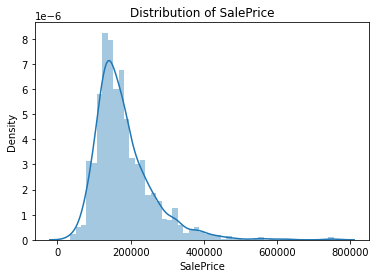

In [52]:
target = data.SalePrice

plt.figure()
sns.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


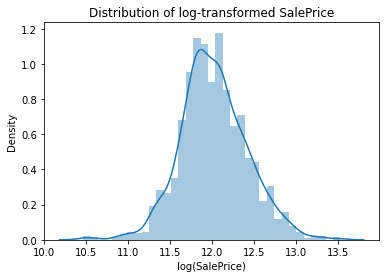

In [53]:
sns.distplot(np.log(target))
plt.title('Distribution of log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [54]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + ' while the log-transformed SalePrice improves the skew to ' + str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


### 1.2.2 Distribution of attributes

/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

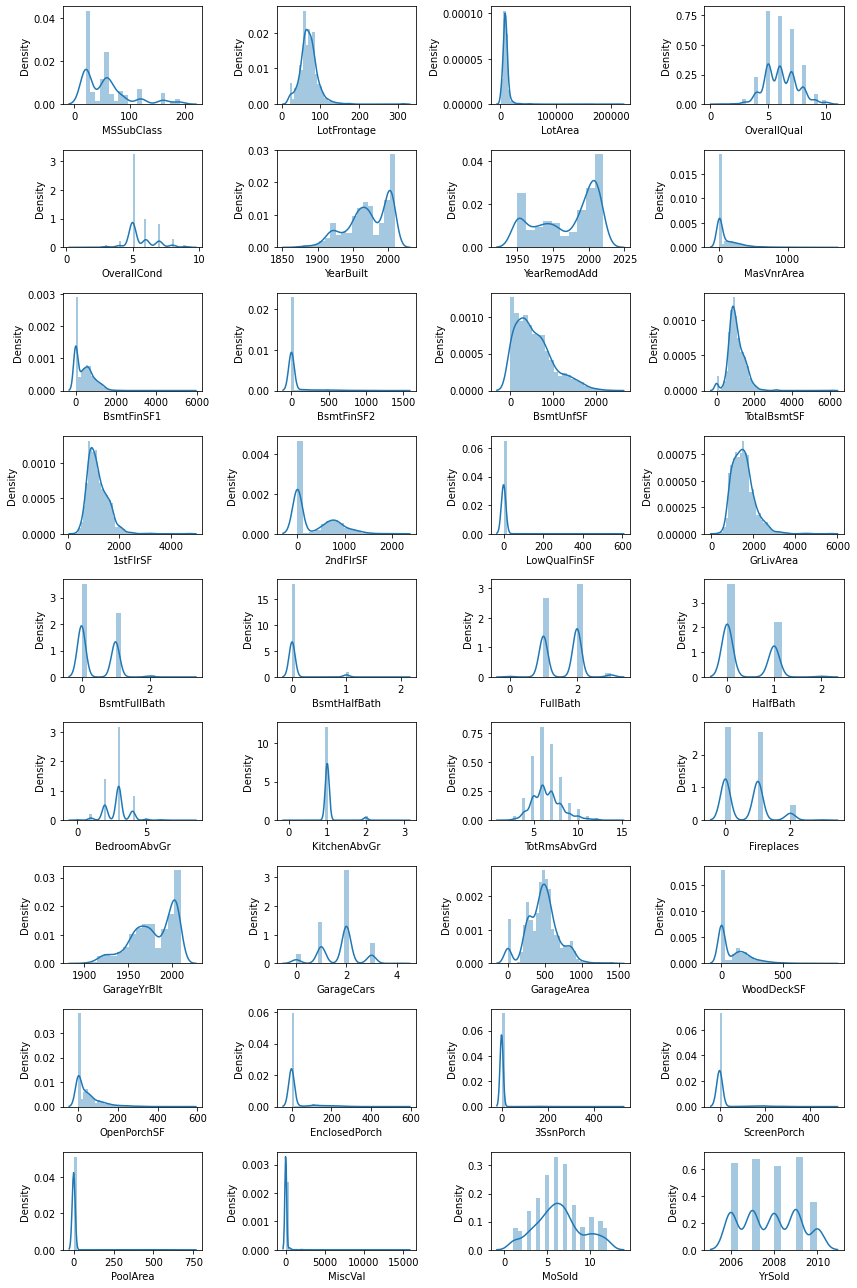

In [55]:
num_attrs = data.select_dtypes(exclude=['object']).drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attrs.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attrs.iloc[:,i].dropna())
    plt.xlabel(num_attrs.columns[i])

plt.tight_layout()
plt.show()


Skewed dists could be potentially be log-transformed:
+ LotFrontage
+ LotArea
+ 1stFlrSF
+ GrLivArea
+ OpenPorchSF

### 1.2.3 Finding outliers

Univariate analysis

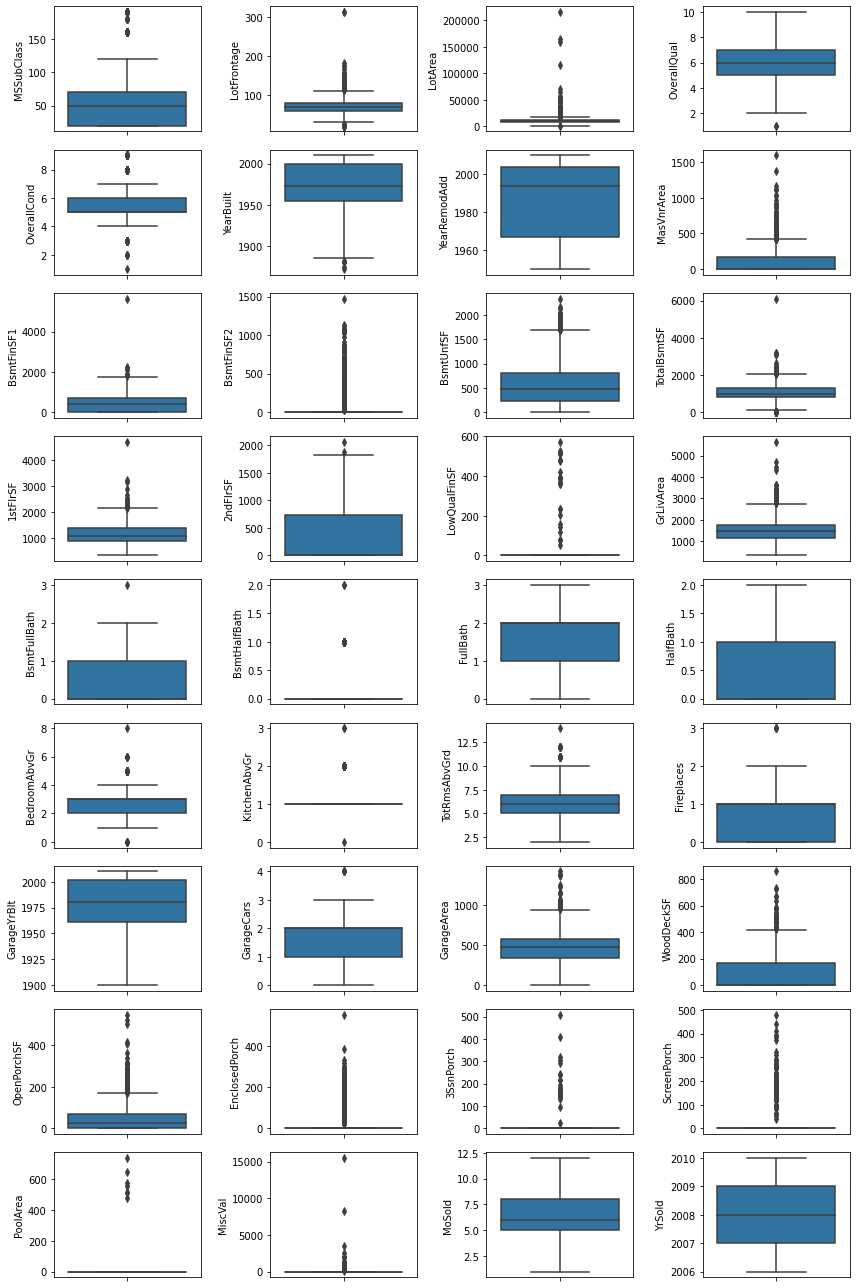

In [56]:
fig = plt.figure(figsize=(12,18))

for i in range(len(num_attrs.columns)):
    fig.add_subplot(9,4, i+1)
    sns.boxplot(y=num_attrs.iloc[:, i])

plt.tight_layout()
plt.show()


Bivariate analysis

/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other argume

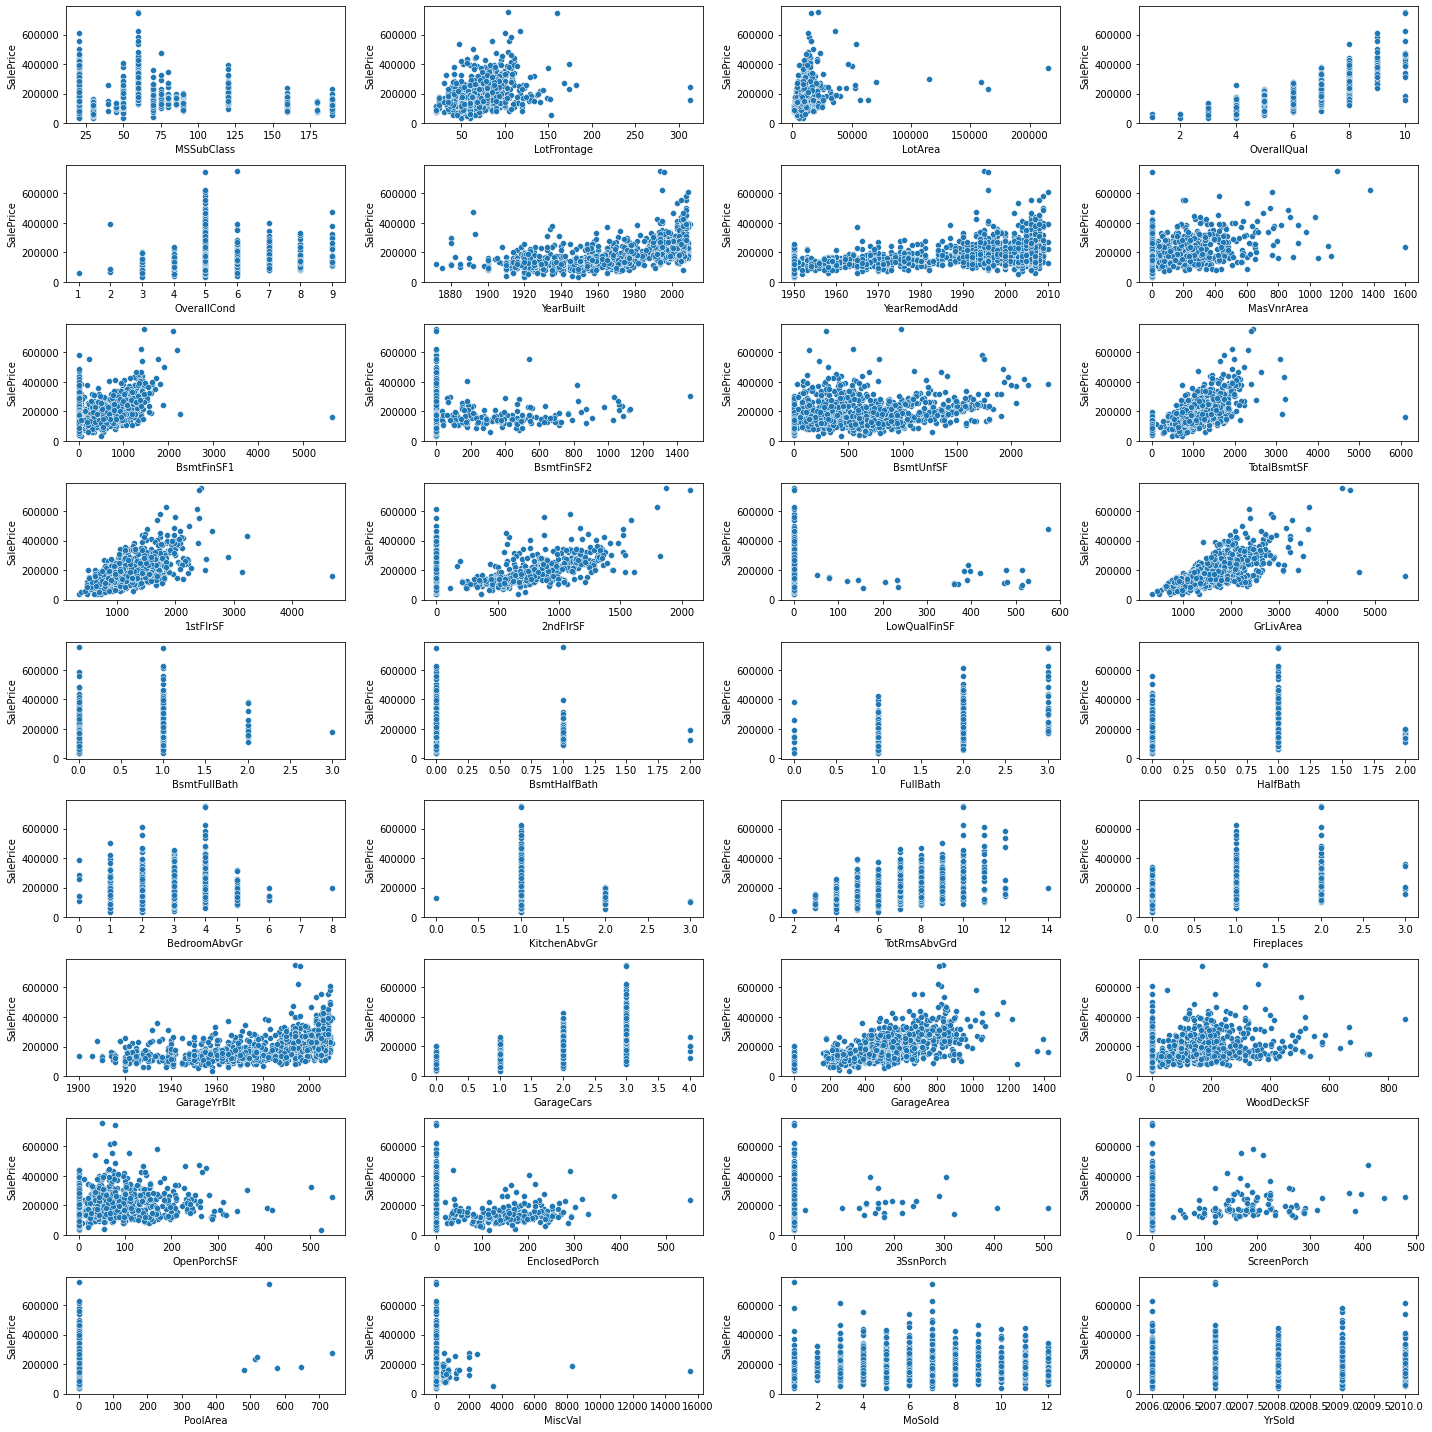

In [57]:
fig = plt.figure(figsize=(20,20))

for i in range(len(num_attrs.columns)):
    fig.add_subplot(9,4,i+1)
    sns.scatterplot(num_attrs.iloc[:, i], target)

plt.tight_layout()
plt.show()

Correlation

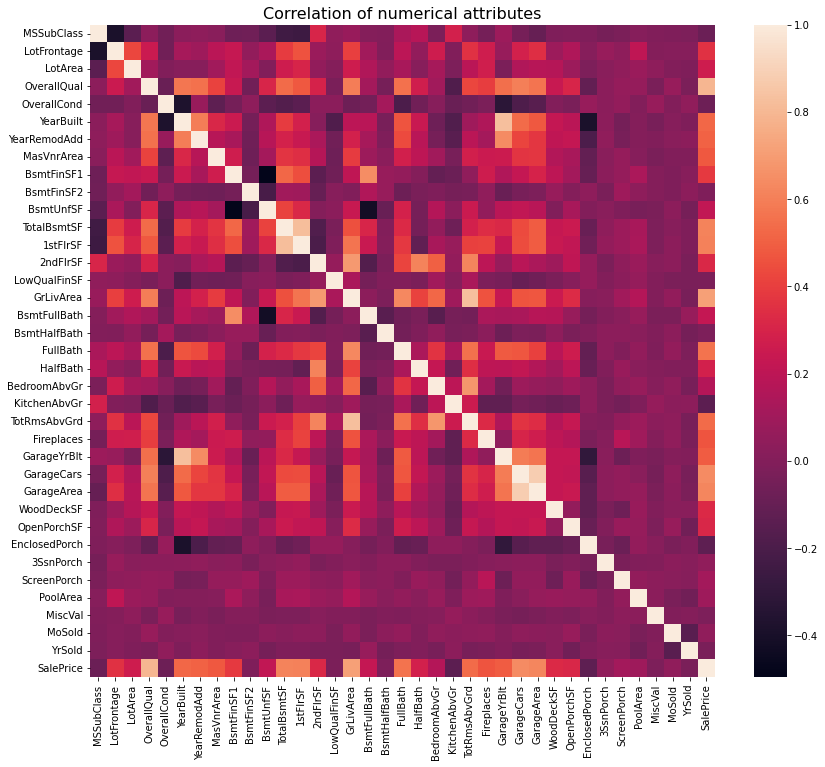

In [58]:
correlation = data.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [59]:
correlation['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

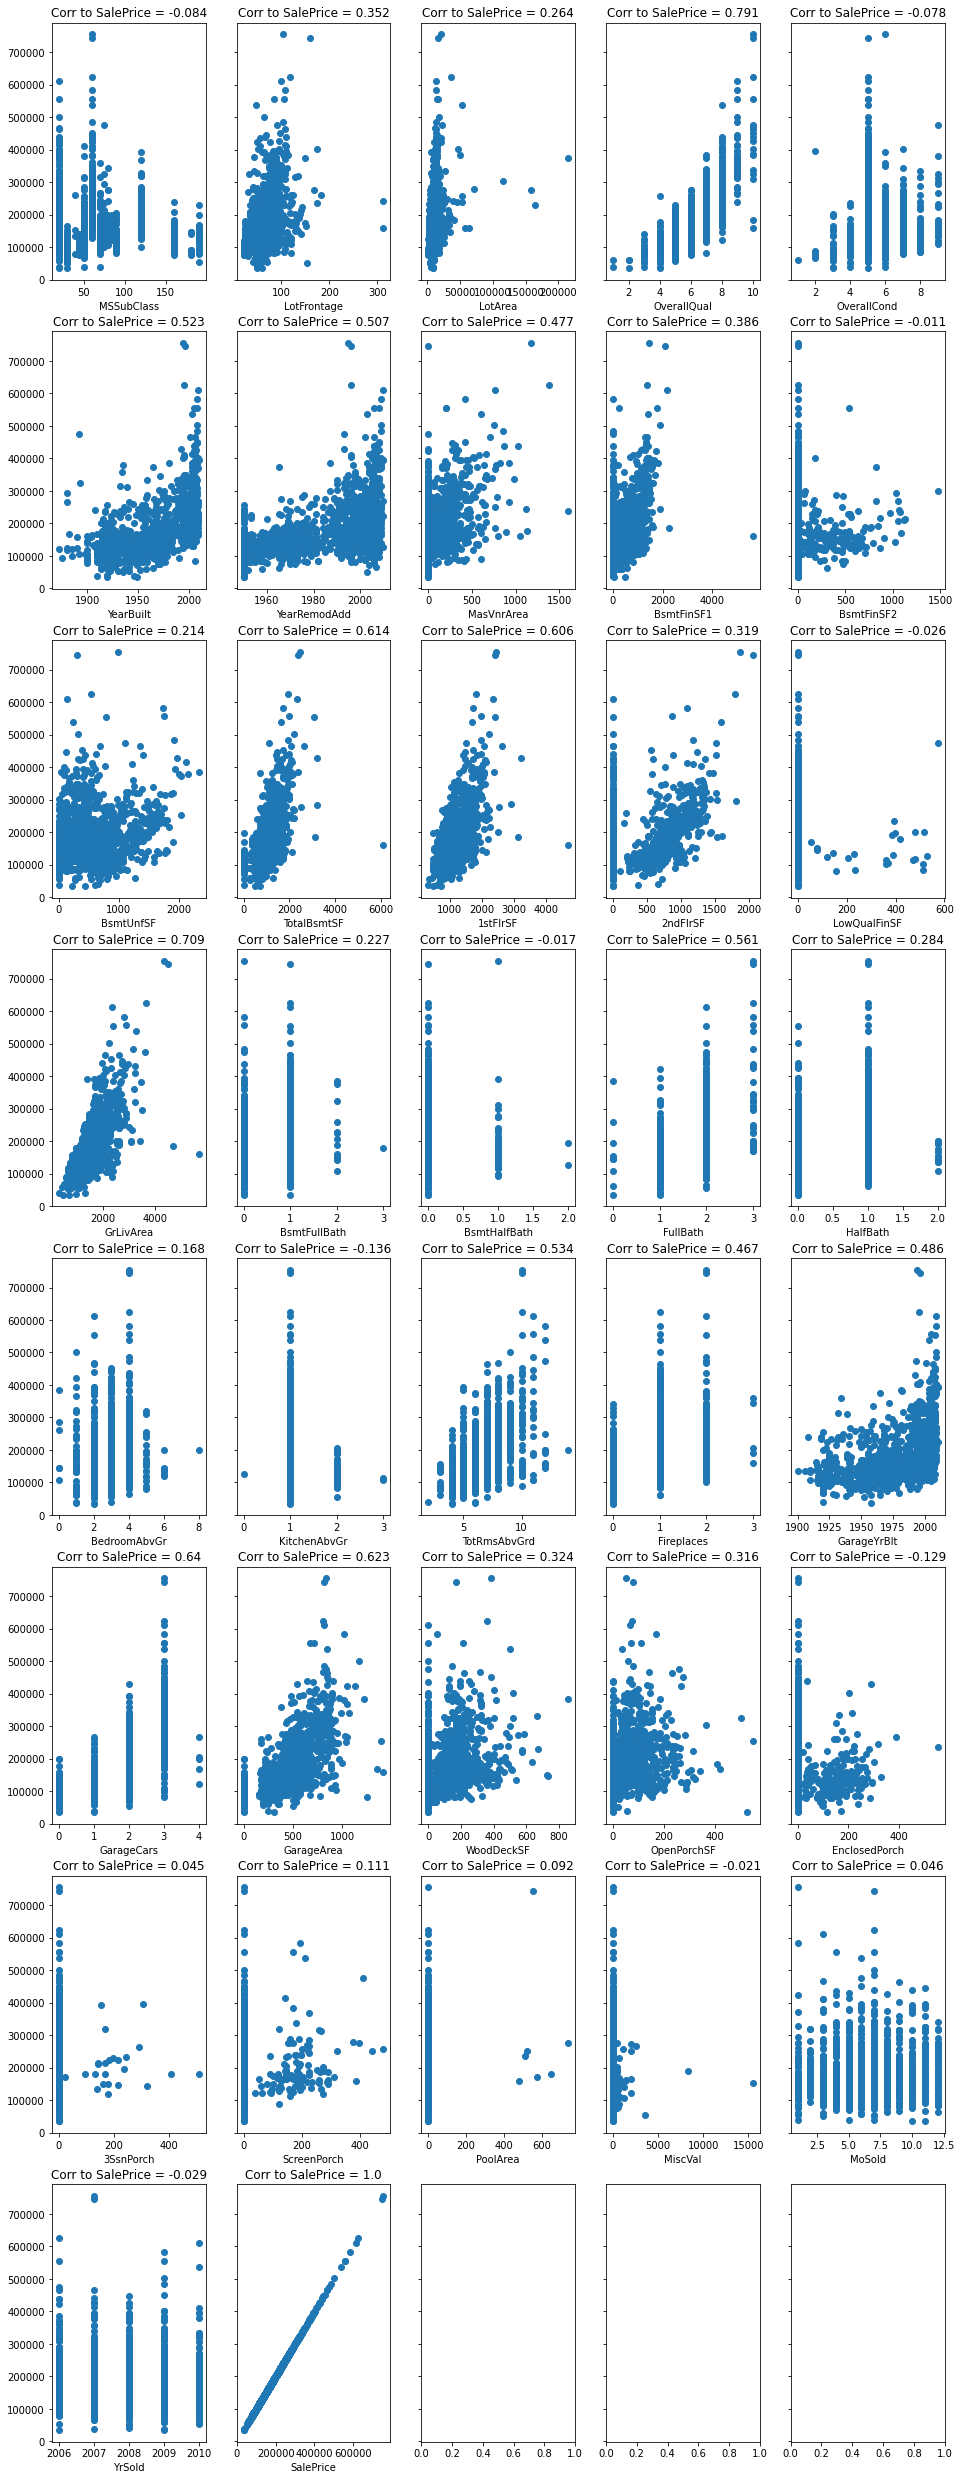

In [60]:
corr_to_price = correlation['SalePrice']
n_cols, n_rows = 5, 8
fix, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_cols):
            plt.scatter(data[num_cols[index]], data.SalePrice)
            plt.xlabel(num_cols[index])
            plt.title('Corr to SalePrice = ' + str(np.around(corr_to_price[index], decimals=3)))
plt.show()

Missing/Null values in numerical cols

In [61]:
num_attrs.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
WoodDeckSF        0
BedroomAbvGr      0
dtype: int64

## 1.3 Exploring categorical columns

In [62]:
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


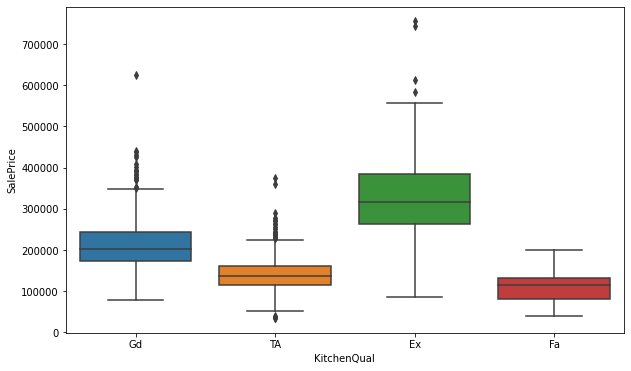

In [63]:
var = data['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(var, data.SalePrice)
plt.show()

/Users/andreasgeyer/dev/exp/py-ml-housing-prices/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


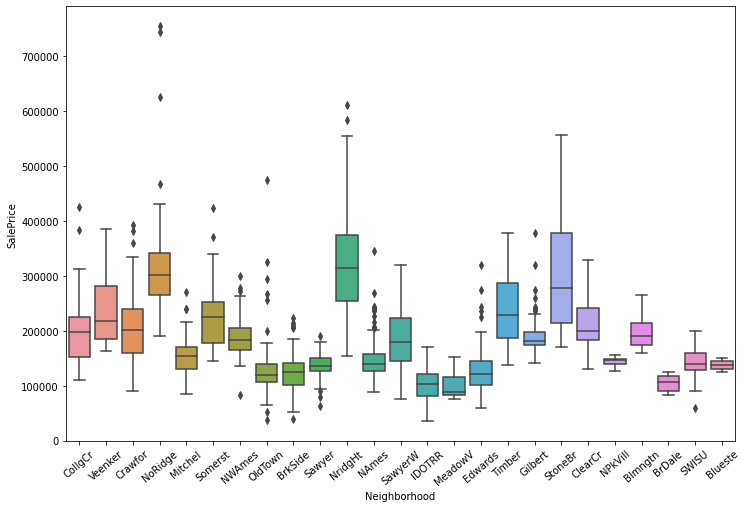

In [64]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data['Neighborhood'], data['SalePrice'])
plt.xticks(rotation=40)
plt.show()

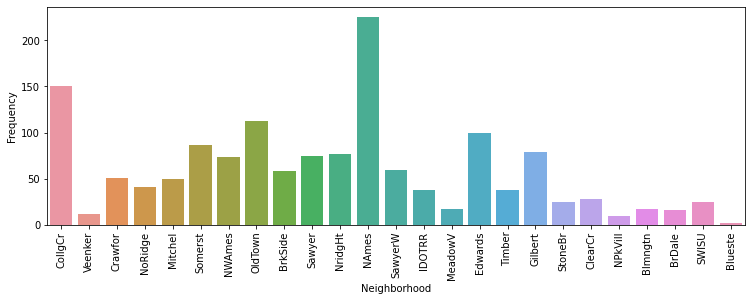

In [65]:
# Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='Neighborhood', data=data)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

Missing/null values in categorical columns

In [66]:
data[cat_cols].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Functional         0
dtype: int64

# 2. Data Cleaning & Preprocessing

## 2.1 Dealing w/ missing/null values

In [67]:
# Create copy of dataset
data_copy = data.copy()

# Numerical columns
data_copy['MasVnrArea'] = data_copy['MasVnrArea'].fillna(0)

# Categorical columns
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']

for cat in cat_cols_fill_none:
    data_copy[cat] = data_copy[cat].fillna('None')

In [68]:
# Check for outstanding missing/null values
# Use imputer for these
data_copy.isna().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
Electrical        1
KitchenAbvGr      0
GarageFinish      0
dtype: int64

## 2.2 Adressing outliers

In [69]:
# Remove outliers based on observations on scatter plots against SalePrice


## 2.3 Transforming data to reduce skew

In [70]:
data_copy['SalePrice'] = np.log(data_copy['SalePrice'])
data_copy = data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

# 3 Feature Selection & Engineering

Considering highly-correlated features

<AxesSubplot:>

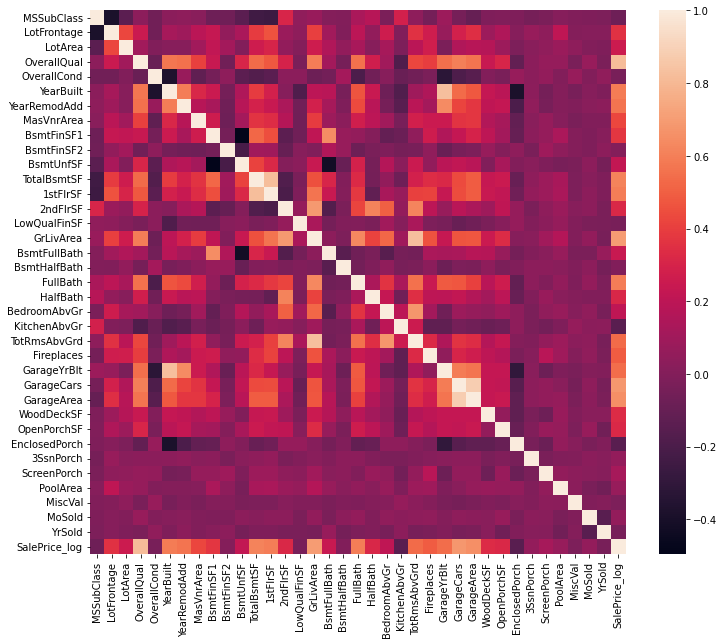

In [71]:
transformed_corr = data_copy.corr()
plt.figure(figsize=(12,10))
sns.heatmap(transformed_corr)


Highly-correlated attrubtes include

- GarageCars and GarageArea
- YearBuilt and GarageYrBlt
- GrLiveArea and TotRmsAbvGrd
- TotalBsmtSF and 1stFlrSF

Perform feature selection and encoding of categorical columns

In [72]:
# Remove attrs that were identified for excluding when viewing scatter plots & corr values
attrs_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd']

X = data_copy.drop(attrs_drop, axis=1)

y = data_copy.SalePrice_log

X = pd.get_dummies(X)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Normalization
normalizer = StandardScaler()
train_X = normalizer.fit_transform(train_X)
val_X = normalizer.transform(val_X)

# Final imputation of missing data
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)